In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from atusfunclib import load_data, group_filter_average

In [3]:
# Import all csv data
data_inport = load_data(loc='data')

In [4]:
# Unpack individual dataframes
df, dfactcodes, dfeducodes, dfinccodes, dfagecodes = data_inport[:5]
dfempcodes, dfindcodes, dfraccodes, dfloccodes, dfwhocodes = data_inport[5:]

In [5]:
# Get filtered, grouped and averaged data
dfedu_filtered, df_byedu, a_byedu = group_filter_average(df, 'PEEDUCA', 'TEAGE', 18, weights='TUFNWGTP')
dfage_filtered, df_byage, a_byage = group_filter_average(df, 'TEAGE_CAT', 'TEAGE', 18, weights='TUFNWGTP')
dfocc_filtered, df_byocc, a_byocc = group_filter_average(df, 'TRDTOCC1', 'TEAGE', 18, weights='TUFNWGTP')
dfinc_filtered, df_byinc, a_byinc = group_filter_average(df, 'TRERNWA_CAT', 'TEAGE', 18, weights='TUFNWGTP')

In [6]:
# Average activity times by group
a_byedu = df_byedu.sum().filter(like='_W').filter(like='t').divide(df_byedu.TUFNWGTP.sum(), axis='index')
a_byage = df_byage.sum().filter(like='_W').filter(like='t').divide(df_byage.TUFNWGTP.sum(), axis='index')
a_byocc = df_byocc.sum().filter(like='_W').filter(like='t').divide(df_byocc.TUFNWGTP.sum(), axis='index')
a_byinc = df_byinc.sum().filter(like='_W').filter(like='t').divide(df_byinc.TUFNWGTP.sum(), axis='index')

/usr/local/lib/python2.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)


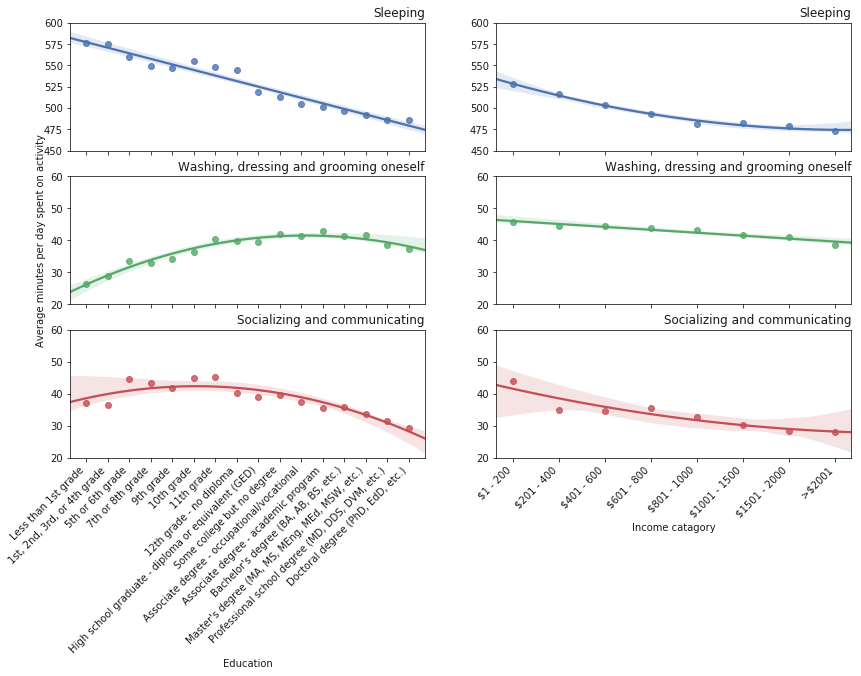

In [28]:
# Regression plot 1
sns.set_color_codes("deep")
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2,
                                                         sharex='col',
                                                         figsize=(14, 8))

sns.regplot(x='PEEDUCA', y='t010101_W', data=a_byedu.reset_index(), order=1, ax=ax1, color='b')
sns.regplot(x='TRERNWA_CAT', y='t010101_W', data=a_byinc.reset_index(), order=2, ax=ax2, color='b')
sns.regplot(x='PEEDUCA', y='t0102_W', data=a_byedu.reset_index(), order=2, ax=ax3, color='g')
sns.regplot(x='TRERNWA_CAT', y='t0102_W', data=a_byinc.reset_index(), order=1, ax=ax4, color='g')
sns.regplot(x='PEEDUCA', y='t1201_W', data=a_byedu.reset_index(), order=2, ax=ax5, color='r')
sns.regplot(x='TRERNWA_CAT', y='t1201_W', data=a_byinc.reset_index(), order=2, ax=ax6, color='r')

ax1.set(ylim=[450,600], ylabel='', xlabel='')
ax2.set(ylim=[450,600], ylabel='', xlabel='')
ax1.set_title('Sleeping', loc='right')
ax2.set_title('Sleeping', loc='right')

ax3.set(ylim=[20,60], ylabel='Average minutes per day spent on activity', xlabel='')
ax4.set(ylim=[20,60], ylabel='', xlabel='')

ax3.set_title('Washing, dressing and grooming oneself', loc='right')
ax4.set_title('Washing, dressing and grooming oneself', loc='right')

ax5.set(ylim=[20,60], ylabel='', xlabel='Education', xticks=range(31,47))
ax6.set(ylim=[20,60], ylabel='', xlabel='Income catagory', xticks=range(1,9))
ax5.set_xticklabels(dfeducodes.NAME.values,
                  rotation=45,
                  ha='right')
ax6.set_xticklabels(dfinccodes.NAME.values,
                  rotation=45,
                  ha='right')
ax5.set_title('Socializing and communicating', loc='right')
ax6.set_title('Socializing and communicating', loc='right')

#plt.savefig('fig06.svg', bbox_inches='tight')

/usr/local/lib/python2.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python2.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python2.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python2.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)


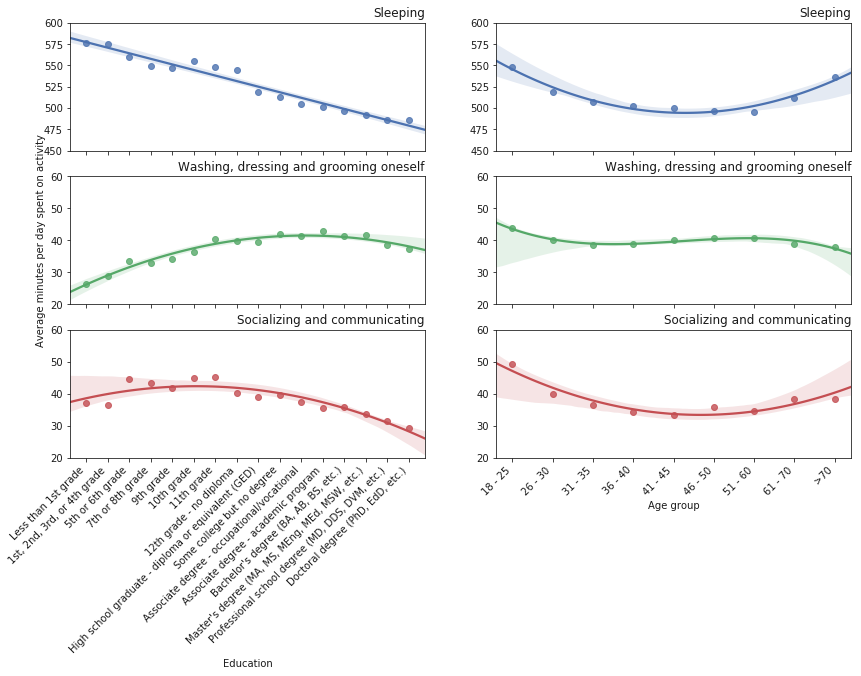

In [40]:
# Regression plot 2
sns.set_color_codes("deep")
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2,
                                                         sharex='col',
                                                         figsize=(14, 8))

sns.regplot(x='PEEDUCA', y='t010101_W', data=a_byedu.reset_index(), order=1, ax=ax1, color='b')
sns.regplot(x='TEAGE_CAT', y='t010101_W', data=a_byage.reset_index(), order=2, ax=ax2, color='b')
sns.regplot(x='PEEDUCA', y='t0102_W', data=a_byedu.reset_index(), order=2, ax=ax3, color='g')
sns.regplot(x='TEAGE_CAT', y='t0102_W', data=a_byage.reset_index(), order=3, ax=ax4, color='g')
sns.regplot(x='PEEDUCA', y='t1201_W', data=a_byedu.reset_index(), order=2, ax=ax5, color='r')
sns.regplot(x='TEAGE_CAT', y='t1201_W', data=a_byage.reset_index(), order=2, ax=ax6, color='r')

ax1.set(ylim=[450,600], ylabel='', xlabel='')
ax2.set(ylim=[450,600], ylabel='', xlabel='')
ax1.set_title('Sleeping', loc='right')
ax2.set_title('Sleeping', loc='right')

ax3.set(ylim=[20,60], ylabel='Average minutes per day spent on activity', xlabel='')
ax4.set(ylim=[20,60], ylabel='', xlabel='')

ax3.set_title('Washing, dressing and grooming oneself', loc='right')
ax4.set_title('Washing, dressing and grooming oneself', loc='right')

ax5.set(ylim=[20,60], ylabel='', xlabel='Education', xticks=range(31,47))
ax6.set(ylim=[20,60], ylabel='', xlabel='Age group', xticks=range(1,10))
ax5.set_xticklabels(dfeducodes.NAME.values,
                  rotation=45,
                  ha='right')
ax6.set_xticklabels(dfagecodes.NAME.values[1:],
                  rotation=45,
                  ha='right')
ax5.set_title('Socializing and communicating', loc='right')
ax6.set_title('Socializing and communicating', loc='right')

#plt.savefig('fig06.svg', bbox_inches='tight')